# Thème Image - TP3 - Introduction au filtrage

## Notebook
* A tout moment, vous pouvez savoir dans quel répertoire vous vous trouvez en utilisant la commande `pwd`et lister les fichiers qui s'y trouvent avec la commande `ls`.

* Accèdez au dossier de travail, pour cela utilisez les commandes `pwd` (print working directory), `cd` (change directory) et `ls`(list contents) pour naviguer sur le disque.

* Changez de repertoire jusqu'a voir tous les fichiers necessaires au TP.

* Familiarisez vous avec les fonctions mises à votre disposition dans le fichier `utils.py`; elles vous seront utiles pour la suite.

* Pour commencer, executez la cellule suivante afin d'avoir accès à votre espace disque.

* Vérifiez que vous êtes au bon endroit, et que tous les fichiers nécessaires au TP sont bien présents. Utilisez la commande `ls` pour cela.

In [4]:
pwd

'c:\\Users\\yoga\\OneDrive\\Desktop\\INFO\\MAP201\\TP3'

* Importez les modules dont vous aurez besoin en exécutant la cellule suivante (`Shift+Enter`).

In [5]:
import math
import statistics
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

plt.ion()

import sys
sys.path.append('..')
from utils import *

test_utils()

Test utils ok


# Objectifs du TP
* Aborder concrètement la notion de filtrage, d'abord en 1D puis en 2D
* Etudier deux filtres de lissage : filtre moyenne et filtre gaussien
* Application : lissage d'une image bruitée
  Image originale & Image bruitée




* Comparer l'effet des deux filtres

# Exercice 1
## Filtrage 1D

On s'intéresse dans un premier temps au filtrage de signaux 1D.

Dans le cadre du filtrage numérique, on travaille sur des vecteurs de nombres.
L'idée du filtrage est de  promener une "fenêtre" sur chacun des éléments du vecteur, et obtenir une nouvelle valeur à partir des éléments de cette fenêtre.


In [6]:
# Creer un vecteur d'indices de taille N (N pourra etre modifie par la suite)
N = 10
s = np.arange(N)
print(f's= {s}')

s= [0 1 2 3 4 5 6 7 8 9]


## Construction de la fenêtre et parcours du signal

* Etant donné un indice $u$ et un entier $m$, comment construire le sous-tableau de $s$ contenant les $2m+1$ éléments suivants :
$s(u-m), ..., s(u), ..., s(u+m)$ ?

* Pour quelles valeurs de $u$ est-il possible de construire ce sous-tableau ?

In [7]:
# Ecrire une fonction permettant d'extraire la fenetre de valeurs [u-m, ..., u, ..., u+m]
def get_window(vec, u, m):
    window = []
    for i in range(u-m,u+m+1):
        window.append(vec[i])
    return window

In [8]:
""" il y'aura des erreurs d'index (out of bounds)
#lorsque u=0
test_win1 = get_window(s, 0, 2)
print(f'u=0 = {test_win1}')

#lorsque u=N-1
test_win2 = get_window(s, len(s)-1, 2)
print(f'u=N-1 = {test_win2}')
"""

# Autre cas problematiques? (si on fait u-m et que le resultat est negatif y'aura un probleme)
test_win = get_window(s, 5, 2)
print(f'test_win= {test_win}')

test_win= [3, 4, 5, 6, 7]


In [9]:
# Ecrire une fonction qui verifie les bornes de la fenetre
def check_and_get_window(vec, u, m):
    
    if u-m < 0 or u + m >= len(vec):
        return False, None
    
    # Compute
    window = []
    for i in range(u-m, u + m + 1):
        window.append(vec[i])
    return True, window

In [10]:
# Tester check_and_get_window
verif,wn=check_and_get_window(s, 5, 2)
print(f"la fenetre peut etre crée ? {verif} \nle resultat est {wn}")
print()
v2,wn2=check_and_get_window(s, 0, 2)
print(f"la fenetre peut etre crée ? {v2} \nle resultat est {wn2}")


la fenetre peut etre crée ? True 
le resultat est [3, 4, 5, 6, 7]

la fenetre peut etre crée ? False 
le resultat est None


In [11]:
# Ecrire une fonction qui extrait toutes les fenetres admissibles a partir du vecteur vec
def print_all_windows(vec, m):
    for u in range(len(vec)):
        ok, win = check_and_get_window(s, u, m)
        if ok:
            print(f'u= {u} --> {win}')


* Pour un vecteur de taille 10, et un rayon $m = 2$ vous devriez obtenir les fenêtres suivantes :
- u= 2 --> [0, 1, 2, 3, 4]
- u= 3 --> [1, 2, 3, 4, 5]
- u= 4 --> [2, 3, 4, 5, 6]
- u= 5 --> [3, 4, 5, 6, 7]
- u= 6 --> [4, 5, 6, 7, 8]
- u= 7 --> [5, 6, 7, 8, 9]

In [12]:
# Tester
print_all_windows(s, 2)

u= 2 --> [0, 1, 2, 3, 4]
u= 3 --> [1, 2, 3, 4, 5]
u= 4 --> [2, 3, 4, 5, 6]
u= 5 --> [3, 4, 5, 6, 7]
u= 6 --> [4, 5, 6, 7, 8]
u= 7 --> [5, 6, 7, 8, 9]


In [13]:
# Refaire le test avec un tableau de valeurs 'physiques'
s2 = np.sin(s)  # np.sin transforme le tableau en [sin(0), sin(1), sin(2), ...]
print(f's2= {s2}')
print_all_windows(s2, 3)

s2= [ 0.          0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427
 -0.2794155   0.6569866   0.98935825  0.41211849]
u= 3 --> [0, 1, 2, 3, 4, 5, 6]
u= 4 --> [1, 2, 3, 4, 5, 6, 7]
u= 5 --> [2, 3, 4, 5, 6, 7, 8]
u= 6 --> [3, 4, 5, 6, 7, 8, 9]


# Exercice 2
## Filtre moyenne

L'application du filtre moyenne consiste à remplacer la valeur d'un élément par la moyenne arithmétique des valeurs sur une fenêtre centrée autour de cet élément.

* En vous inspirant de l'exercice précédent, écrives une fonction qui à partir d'un tableau $s$ renvoie le tableau $s_{mean}$ défini de la façon suivante :
  * si on peut définir une fenêtre de taille $2m+1$ autour de l'indice $u$, $s_{mean}[u]$ est la moyenne des éléments de la fenêtre,
  * sinon $s_{mean}[0] = 0$.

_**Indication** : Vous pourrez utiliser la fonction `check_and_get_window` pour extraire de manière sécurisée les fenêtres, et la fonction `statistics.mean()` pour calculer la moyenne._

_Exemple :_
L'application du filtre moyen dayon $m=1$ sur le vecteur $s = [0, 0, 0, 0, 0, 3, 3, 3, 3, 3]$ doit produire $s_{mean}= [0, 0, 0, 0, 1, 2, 3, 3, 3, 0]$.

* Que pensez-vous de ce résultat ?

In [14]:
# Ecrire une fonction permettant d'appliquer un filtre moyen sur un vecteur
def mean_filter(vec, m):
    mean_vec = []  # Nouveau vecteur de valeurs
    for i in range(len(vec)):
        ok, win = check_and_get_window(vec,i,m)
        if ok:
            mean_val = statistics.mean(win)
        else:
            mean_val = 0
        mean_vec.append(mean_val)
    return mean_vec


s= [0, 0, 0, 0, 0, 3, 3, 3, 3, 3]
s_mean= [0, 0, 0, 0, 1, 2, 3, 3, 3, 0]


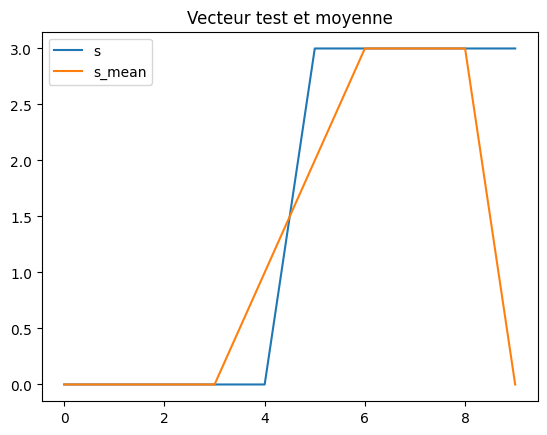

In [15]:
# Definir un vecteur de valeurs
s = [0, 0, 0, 0, 0, 3, 3, 3, 3, 3]
print(f's= {s}')

# Lisser
s_mean = mean_filter(s, 1)

# Comparer
print(f's_mean= {s_mean}')
show_vectors(s, s_mean, labels=['s', 's_mean'], title='Vecteur test et moyenne')


S= [0, 3, 5, 3, 7, 6, 5, 4, 5, 3]
s_mean= [0, 2.6666666666666665, 3.6666666666666665, 5, 5.333333333333333, 6, 5, 4.666666666666667, 4, 0]


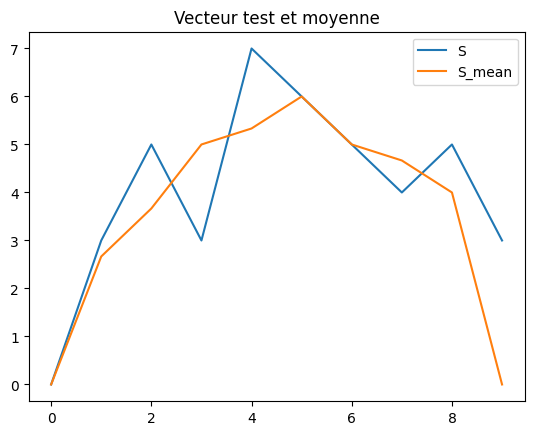

In [16]:
S = [0, 3, 5, 3, 7, 6, 5, 4, 5, 3]
print(f'S= {S}')

# Lisser
S_mean = mean_filter(S, 1)

# Comparer
print(f's_mean= {S_mean}')
show_vectors(S, S_mean, labels=['S', 'S_mean'], title='Vecteur test et moyenne')


* Essayer avec un vecteur plus long, contenant des valeurs 'physiques' et du bruit.

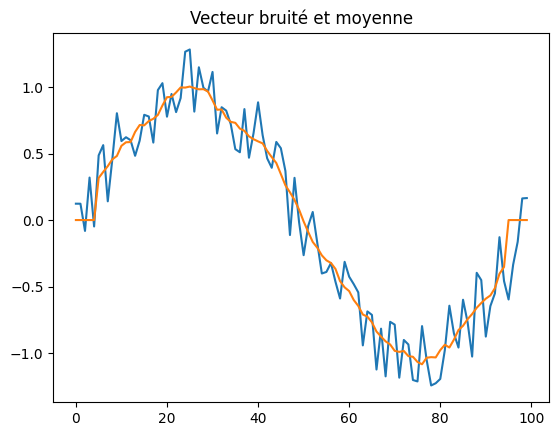

In [17]:
# Generer le signal pur
M = 100
s = np.sin(2 * np.pi * np.arange(M) / M)

# Generer un bruit blanc (distribution aleatoire uniforme)
noise_magnitude = 0.3
noise = noise_magnitude * np.random.randint(-100, +100, M) / 100

# Appliquer le bruit au signal
s = s + noise

# Filtrer
s_mean = mean_filter(s, 5)

# Comparer
show_vectors(s, s_mean, title='Vecteur bruité et moyenne')

# Exercice 3
## Moyenne pondérée

La moyenne arithmétique accorde un poids égal à chacun des pixels sur une fenêtre donnée. On considère d'autres types de moyennes, dites pondérées,
où un poids différent peut être accordé à chaque pixel.

Dans un cadre totalement différent, pensez à la note du baccalauréat qui est obtenue en affectant des coeficients différents selon les matières, en faisant la somme de toutes ces notes, puis en divisant par la somme des coefficients
pour ramener la note sur 20.

Ici, on fait de même : étant donné un tableau $W$ de taille $2m+1$ et un vecteur $s$, on veut construire un vecteur $s2$ tel que pour chaque indice $u$, $s2[u]$ contient la moyenne pondérée par les poids $W$ sur la fenêtre
de taille $2m+1$ autour de l'élément d'indice $u$ si on peut définir cette fenêtre, et sinon $0$.

* Etant donné un vecteur $W$ de taille $2m+1$ qu'on suppose normalisé (dont la somme des coefficients vaut 1), et un tableau $s$ contenant un signal, comment calculer $s2$ la moyenne pondérée de $s$ par les poids $W$ ?

_**Indications** : la fonction numpy.sum() calcule la somme des éléments d'un tableau. L'opérateur * permet de multiplier terme à terme deux tableaux dans numpy. Voir l'exemple dans la cellule ci-dessous._

In [18]:
# Exemple d'utilisation des opérateurs de numpy
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(a*b)
print(np.sum(a * b))

[ 4 10 18]
32


In [19]:
# Ecrire une fonction qui calcule une moyenne ponderee en appliquant un filtre
def apply_filter(s, W):
    s2 = []
    m = int((len(W) - 1) / 2)  # si le filtre a une taille paire on aura m comme un reel
    for i in range(len(s)):
        ok, win = check_and_get_window(s,i,m)
        if ok:
            mean_val = np.sum(win*W) / len(W)
        else:
            mean_val = 0
        s2.append(mean_val)
    return s2

s= [0, 0, 0, 0, 0, 3, 3, 3, 3, 3]
W= [0.25 0.5  0.25]


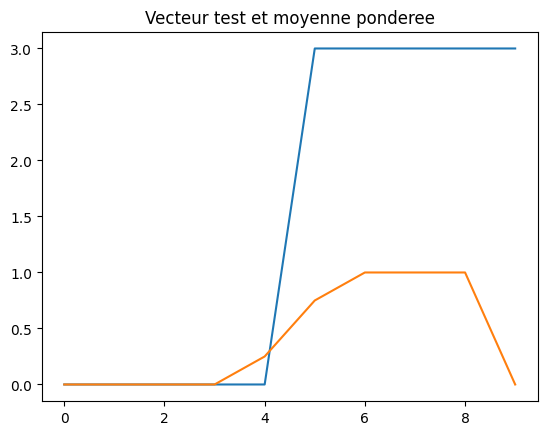

In [20]:
# Definir un vecteur de valeurs
s = [0, 0, 0, 0, 0, 3, 3, 3, 3, 3]
print(f's= {s}')

# Definir un filtre de moyenne ponderee
W = np.array([0.5, 1.0, 0.5]) / 2.0
print(f'W= {W}')

# Tester
s_wmean = apply_filter(s, W)
show_vectors(s, s_wmean, title='Vecteur test et moyenne ponderee')

* Testez avec les poids $1/3*[1, 1, 1]$, vous devez retrouver le même résultat qu'à l'exercice précédent.

W= [0.33333333 0.33333333 0.33333333]
s= [0, 0, 0, 0, 0, 3, 3, 3, 3, 3]
s_mean= [0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.6666666666666666, 1.0, 1.0, 1.0, 0]


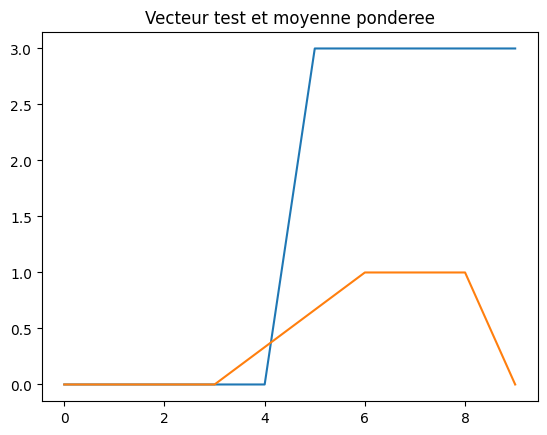

In [21]:
# En utilisant le filtre moyen de l'exercice precedent, on doit retrouver le meme resultat
# A COMPLETER
W = np.array([1,1,1]) / 3.0
print(f'W= {W}')

s = [0, 0, 0, 0, 0, 3, 3, 3, 3, 3]
print(f's= {s}')

s2 = apply_filter(s, W)
print(f's_mean= {s2}')
show_vectors(s, s2, title='Vecteur test et moyenne ponderee')

* Que se passe-t-il si on ne normalise pas le filtre ?

'si on normalise pas le filtre cela signifie que chaque élément du résultat S_wmeans \nsera simplement la somme des produits des éléments correspondants de \ns et de W'

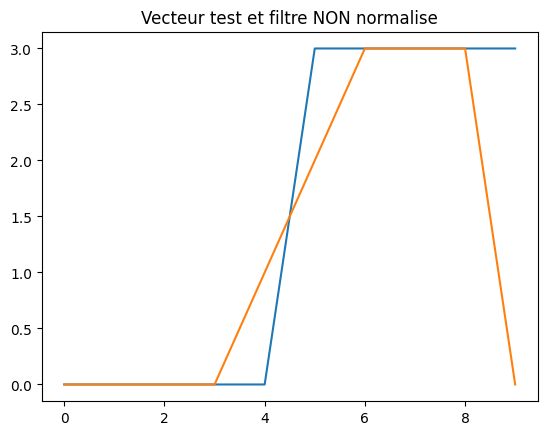

In [22]:
W = np.array([1.0, 1.0, 1.0])  # Pas de normalisation: / 3.0
s_wmean = apply_filter(s, W)
show_vectors(s, s_wmean, title='Vecteur test et filtre NON normalise')

"""si on normalise pas le filtre cela signifie que chaque élément du résultat S_wmeans 
sera simplement la somme des produits des éléments correspondants de 
s et de W"""

# Exercice 4
## Filtre gaussien

La fonction gaussienne $f(x) = e^{-\frac{x^2}{2\sigma^2}}$ a une forme de chapeau qui est intéressante pour construire une moyenne pondérée avec une
valeur plus importante sur l'élément central de la fenêtre et une décroissance rapide et régulière sur les autres éléments.

De plus la largeur du chapeau est contrôlée par le paramètre $\sigma$ (sigma), ce qui permet d'obtenir facilement une famille de filtres de taille plus ou moins grande.

In [23]:
import math
# Fonction gaussienne
def f(x, sig):
    return math.exp(-x**2 / (2 * sig**2))

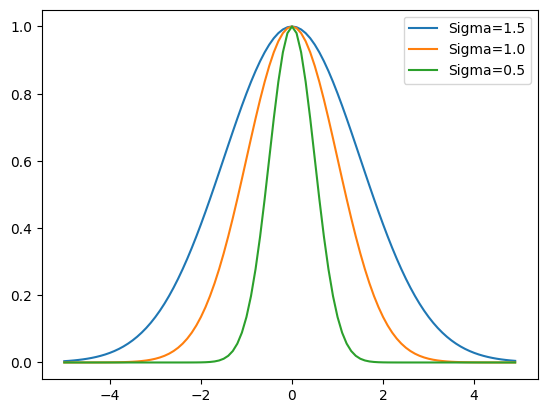

In [24]:
# Courbes gaussiennes pour quelques valeurs de sigma
x = np.arange(-5.0, +5.0, 0.1)

fig = plt.figure()
ax = fig.add_subplot()
for sigma in [1.5, 1.0, 0.5]:
  y = [f(x, sigma) for x in x]
  ax.plot(x, y, label=f'Sigma={sigma}')

_ = ax.legend()

L'idée du filtre gaussien consiste à prendre les valeurs de $f(x)$ pour $x$ parcourant des ensembles de la forme $\lbrace -L, \ldots, 0, \ldots, L\rbrace$ où $L$ est choisi tel que $f(L+1)$ soit négligeable devant $f(0) = 1$.

Par exemple pour $\sigma = 0.5$ (voir courbe ci-dessus), on a
$f(0) = 1, f(1) \approx 0.135, f(2) \approx 0.0003$, donc $f(2)$ est négligeable devant $f(0)$.

Si on prend $L=1$ les poids correspondant à $\sigma = 0.5$ sont
$[0.135, 1, 0.135]$ avant normalisation.



In [25]:
sigma = 0.5
print(f'f(0)= {f(0, sigma)}')
print(f'f(1)= {f(1, sigma)}')
print(f'f(2)= {f(2, sigma)}')

# Et evidemment
print('\nLa distribution gaussienne est paire, donc')
print(f'f(-1)= f(1)= {f(-1, sigma)}')
print(f'f(-2)= f(2)= {f(-2, sigma)}')

f(0)= 1.0
f(1)= 0.1353352832366127
f(2)= 0.00033546262790251185

La distribution gaussienne est paire, donc
f(-1)= f(1)= 0.1353352832366127
f(-2)= f(2)= 0.00033546262790251185


De manière générale, on se fixe un seuil $\varepsilon$ et pour une valeur de $\sigma$ donnée, et on choisit la taille $L$ du filtre de telle manière que $f(L) > \varepsilon$ et $f(L + 1) < \varepsilon$.

* Montrez que  $f(L) > \varepsilon \Longleftrightarrow L < \sigma\sqrt{-2\log(\varepsilon)}$.

* Modifiez la cellule suivante pour définir une fonction qui calcule le tableau $[f(-L), ..., f(0), ..., f(L)]$ où $L$ est le plus grand entier vérifiant $f(L) > \varepsilon$ en fonction de paramètres $sigma$ et $epsilon$. Cette fonction doit ensuite renvoyer le tableau normalisé (dont la somme des éléments est égale à 1).

In [26]:
# Ecrire une fonction qui genere un filtre gaussien de parametre sigma de taille max
def get_gauss_filter(sigma, epsilon):
    # Trouver le plus grand entier L tel que f(L) > epsilon
    # f(L) < eps <==> abs(L) < sig sqrt(-2 ln(eps)) i.e., L < sigma * math.sqrt(-2 * math.log(epsilon))  , puisque L>0
    L = int (sigma * math.sqrt(-2 * math.log(epsilon))) 
    
    """
    print(f'Check f(L)   >  {epsilon}: {f(L, sigma)}')
    print(f'Check f(L+1) <= {epsilon}: {f(L+1, sigma)}')
    """

    # Calculer les poids
    w = []
    for i in range(-L, +L + 1):
        w.append(f(i,sigma))
        
    # Normaliser les poids pour obtenir le filtre
    w_sum = sum(w)
    fil = np.array(w) / w_sum
    return fil

* On fixe $\varepsilon = 10^{-3}$.

* Vous pouvez tester votre fonction pour $\sigma = 0.5$ et $epsilon=0.001$ `get_gauss_filter` doit renvoyer $[0.106507 0.786986 0.106507]$. Remarquez qu'on a bien $\sum_i g_i = 1$.

_**IMPORTANT** : Vous devez avoir terminé cet exercice et obtenu le résultat demandé car vous aurez besoin de la fonction `get_gauss_filter` pour le reste de cette séance et (au moins) la séance suivante._

In [27]:
# On se donne un epsilon
eps = 0.001

# Test
get_gauss_filter(0.5, 0.001)

array([0.10650698, 0.78698604, 0.10650698])

* Remplissez le tableau suivant qui indique la taille du tableau en fonction de quelques valeurs de $\sigma$ :
  * $\sigma = 0.5 \Rightarrow size = ?$
  * $\sigma = 1.0 \Rightarrow size = ?$
  * $\sigma = 1.5 \Rightarrow size = ?$
  * $\sigma = 2.0 \Rightarrow size = ?$

Ici, $size$ est la taille du filtre, c'est-à-dire la taille du tableau, c'est-à-dire $2*L + 1$.

In [28]:
# Calculer les longueurs des filtres gaussiens pour les valeurs de sigma suivantes
print(f"sigma= 0.5 --> size = {len(get_gauss_filter(0.5, 0.001))}")
print(f"sigma= 1 --> size = {len(get_gauss_filter(1.0, 0.001))}")
print(f"sigma= 1.5 --> size = {len(get_gauss_filter(1.5, 0.001))}")
print(f"sigma= 2 --> size = {len(get_gauss_filter(2.0, 0.001))}")

sigma= 0.5 --> size = 3
sigma= 1 --> size = 7
sigma= 1.5 --> size = 11
sigma= 2 --> size = 15


# Exercice 5
## Lissage d'un signal bruité

Nous allons extraire un signal bruité à partir de l'image papillon_noise.bmp. La cellule ci-dessous extrait la ligne 128 de l'image et l'affiche sous forme de courbe.

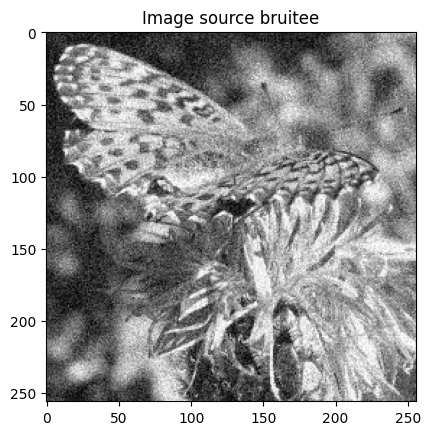

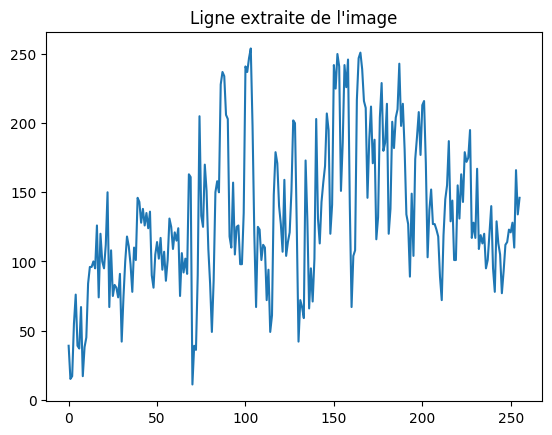

In [29]:
# Charger l'image bruitee
img = load_and_show_image('./papillon_noise.bmp', title='Image source bruitee')

# Extraire la ligne 128
row = img[128, :]

# Afficher le vecteur
show_vectors(row, title="Ligne extraite de l'image")


* Testez l'effet du filtre moyenne sur le vecteur $row$ en augmentant progressivement la taille de la fenêtre : 3, 5, 11, 21.

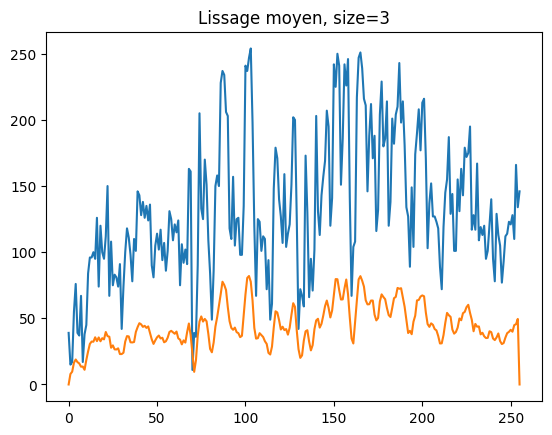

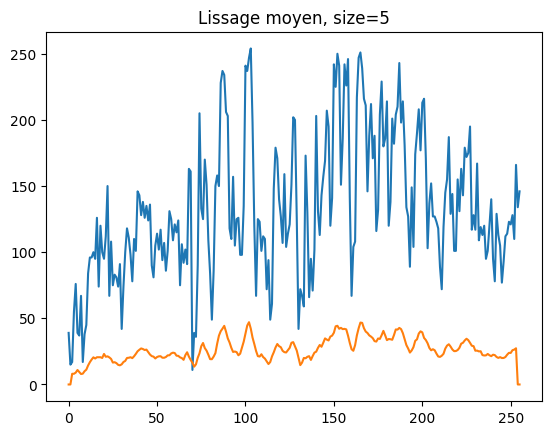

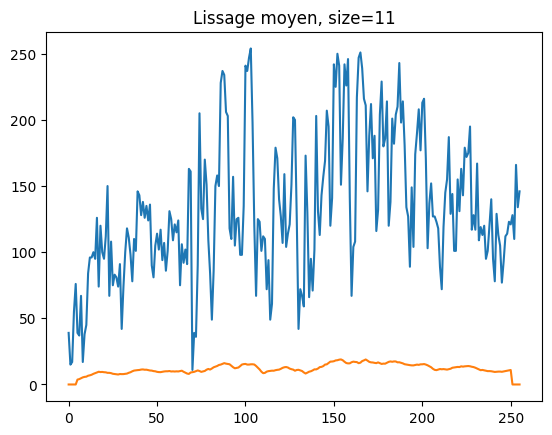

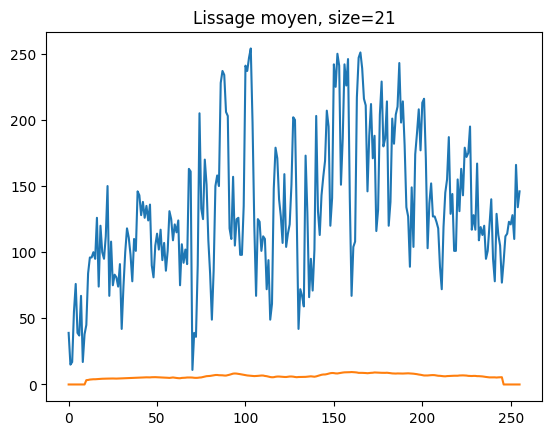

In [30]:
# Lisser avec filtres moyens de taille 3, 5, 11, 21
mean_filtering = [row]
for size in [3, 5, 11, 21]:
    mean_fil = np.ones(size) / size  # Vecteur de poids pour le filtre moyen
    mean_row = apply_filter(row, mean_fil)
    mean_filtering.append(mean_row)

    # Afficher chaque paire
    show_vectors(row, mean_row, title=f'Lissage moyen, size={size}')


* On peut afficher tous les signaux les uns sur les autre, mais c'est moins lisible...

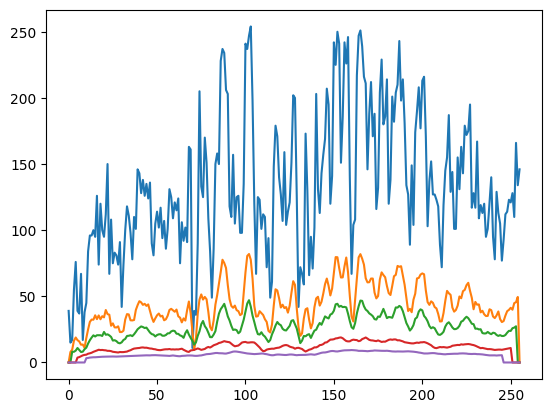

In [31]:
show_vectors(*mean_filtering)

* Testez l'effet du filtre Gaussien sur le vecteur $row$ en augmentant progressivement la valeur de $\sigma$ : 0.5, 1, 3, 5.

C:\Users\yoga\AppData\Local\Temp\ipykernel_19532\4026508034.py:8: RuntimeWarning: invalid value encountered in scalar divide
  mean_val = np.sum(win*W) / len(W)


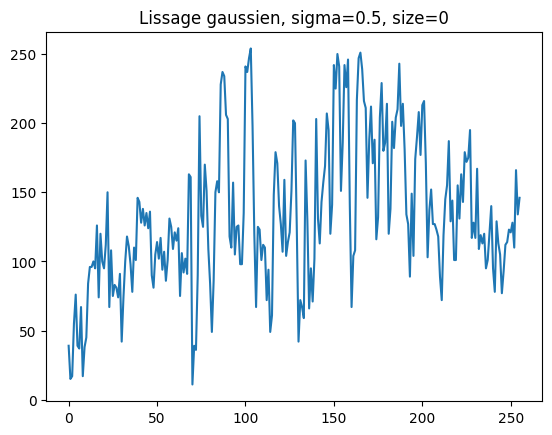

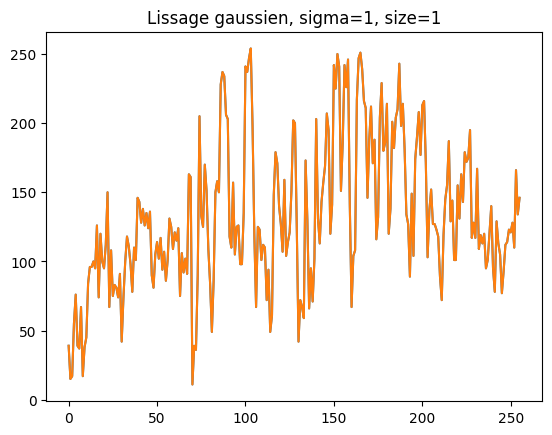

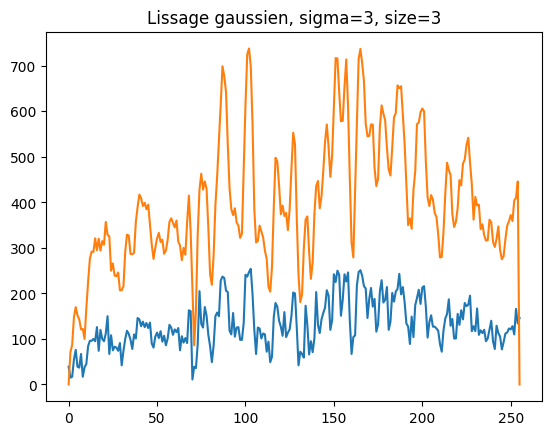

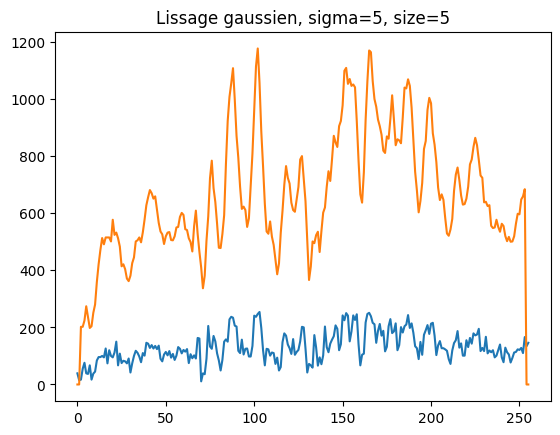

In [32]:
# Lisser avec des filtres gaussiens, avec sigma= 0.5, 1, 3, 5
gauss_filtering = [row]
for sigma in [0.5, 1, 3, 5]:

    gauss_fil = np.ones(int(sigma))*sigma
    gauss_row = apply_filter(row, gauss_fil)
    gauss_filtering.append(gauss_row)

    # Afficher chaque paire
    show_vectors(row, gauss_row, title=f'Lissage gaussien, sigma={sigma}, size={len(gauss_fil)}')


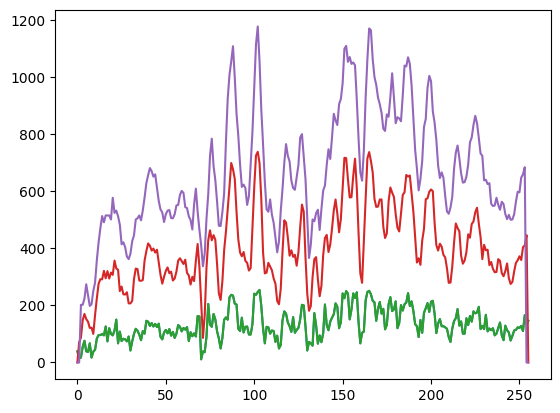

In [33]:
# La encore, on peut afficher tout le monde sur la même figure... mais c'est un peu fouillis
show_vectors(*gauss_filtering)

# Exercice 6
## Filtrage 2D

On se place maintenant dans le cadre du filtrage appliqué aux images. Le signal ici est constitué des valeurs des pixels dans un tableau à deux dimensions et les fenêtres que l'on va déplacer sur l'image sont des carrés centrés sur le pixel considéré.

## Construction de la fenêtre et parcours de l'image

Soit $im$ un tableau de taille $M \times N$ contenant une image.

* Etant donné un pixel désigné par un couple d'indices $(u,v)$ et un entier $m$, comment construire le sous-tableau de $im$ contenant les $(2m+1)^2$ éléments autour du pixel ?

* Pour quelles valeurs de $(u,v)$ est-il possible de construire ce sous-tableau ?

In [34]:
# Ecrire une fonction qui extrait une fenetre centree sur (u, v) taille (2*m + 1)x(2*m + 1)
def check_and_get_window_2D(img, u, v, m):
    # Check
    # A COMPLETER
    if u-m < 0 or u + m >= len(img):
        return False, None
    
    # Check
    # A COMPLETER
    if v-m < 0 or v + m >= len(img[0]) :
        return False, None
    
    # Compute
    window = np.empty((2*m+1, 2*m+1))
    for i in range(-m, +m+1):
        for j in range(-m, +m+1):
            window[i + m, j + m] = img[u + i, v + j]
    return True, window

* Testez votre fonction à l'aide de la cellule ci-dessous.

In [35]:
# Construire un tableau 2D d'indices
im = np.zeros([10, 10])
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        im[i, j] = i*10 + j

print(im)

# Test 1
ok, win = check_and_get_window_2D(im, 1, 1, 2)
print(f'Should be False: {ok}')

# Test 2
m = 2
ok, win = check_and_get_window_2D(im, 3, 3, m)
print(f'Should be True: {ok}')
print(f'Window (size= {2*m+1}x{2*m+1}) should be centered on element "33"=\n{win}')

# Autres tests
# A completer...

[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
 [20. 21. 22. 23. 24. 25. 26. 27. 28. 29.]
 [30. 31. 32. 33. 34. 35. 36. 37. 38. 39.]
 [40. 41. 42. 43. 44. 45. 46. 47. 48. 49.]
 [50. 51. 52. 53. 54. 55. 56. 57. 58. 59.]
 [60. 61. 62. 63. 64. 65. 66. 67. 68. 69.]
 [70. 71. 72. 73. 74. 75. 76. 77. 78. 79.]
 [80. 81. 82. 83. 84. 85. 86. 87. 88. 89.]
 [90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]]
Should be False: False
Should be True: True
Window (size= 5x5) should be centered on element "33"=
[[11. 12. 13. 14. 15.]
 [21. 22. 23. 24. 25.]
 [31. 32. 33. 34. 35.]
 [41. 42. 43. 44. 45.]
 [51. 52. 53. 54. 55.]]


* Initialisez l'image $im$ en exécutant la cellule ci-dessous.

In [36]:
# Test 3
im = np.array([[1, 0, 0, 0],
               [0, 2, 0, 0],
               [0, 0, 3, 0],
               [0, 0, 0, 4]])


* Trouvez toutes les fenêtres de taille 3x3 de ce tableau.

Vous devez obtenir le resultat suivant :

    -----------------
    [[1. 0. 0.]
     [0. 2. 0.]
     [0. 0. 3.]]
    -----------------
    [[0. 0. 0.]
     [2. 0. 0.]
     [0. 3. 0.]]
    -----------------
    [[0. 2. 0.]
     [0. 0. 3.]
     [0. 0. 0.]]
    -----------------
    [[2. 0. 0.]
     [0. 3. 0.]
     [0. 0. 4.]]

In [37]:
for u in range(im.shape[0]):
    for v in range(im.shape[1]):
        ok, win = check_and_get_window_2D(im,u,v,1)
        if ok:
            print('-----------------')
            print(win)

-----------------
[[1. 0. 0.]
 [0. 2. 0.]
 [0. 0. 3.]]
-----------------
[[0. 0. 0.]
 [2. 0. 0.]
 [0. 3. 0.]]
-----------------
[[0. 2. 0.]
 [0. 0. 3.]
 [0. 0. 0.]]
-----------------
[[2. 0. 0.]
 [0. 3. 0.]
 [0. 0. 4.]]


# Exercice 7
## Filtre moyenne

De même qu'en 1D, l'application de ce filtre consiste à calculer la nouvelle valeur d'un pixel comme étant la  moyenne des valeurs sur une fenêtre centrée autour de lui.

* En vous inspirant de l'exercice précédent, écrivez une fonction qui à partir d'une image $im$ renvoie l'image $im2$ définie de la façon suivante :
  * pour chaque couple d'indices $(u,v)$, $im2[u,v]$ contient la moyenne de la fenêtre de taille $(2m+1)^2$ autour de $im(u,v)$ si la fenêtre est définie, et sinon $0$.

* Vous pouvez tester avec une image simple contenant un carré noir sur fond blanc.

* Vous pouvez faire varier la taille de la fenêtre et observer le résultat.


In [38]:
# Ecrire une fonction qui applique un filtre moyen a une image
def mean_filter_2D(img, m):
    # Creer une image vide de la meme taille que l'image en entree
    mean_img = np.empty(img.shape)

    # Appliquer le filtre
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            
            ok, win = check_and_get_window_2D(img,i,j,m)
            if ok:
                mean_val = np.mean(win)
                mean_img[i, j] = mean_val
            else:
                mean_img[i,j] = 0
    return mean_img

[[255. 255. 255. 255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255.   0.   0.   0.   0. 255. 255. 255.]
 [255. 255. 255.   0.   0.   0.   0. 255. 255. 255.]
 [255. 255. 255.   0.   0.   0.   0. 255. 255. 255.]
 [255. 255. 255.   0.   0.   0.   0. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255.]]
[[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.         255.         255.         255.         255.
  255.         255.         255.         255.           0.        ]
 [  0.         255.         226.66666667 198.33333333 170.
  170.         198.33333333 226.66666667 255.           0.        ]
 [  0.         255.         198.33333333 141.66666667  85.
   85.         141.66666667 1

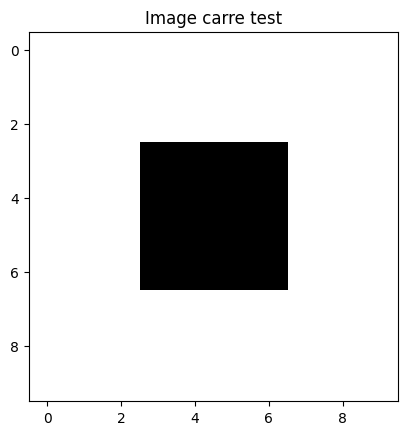

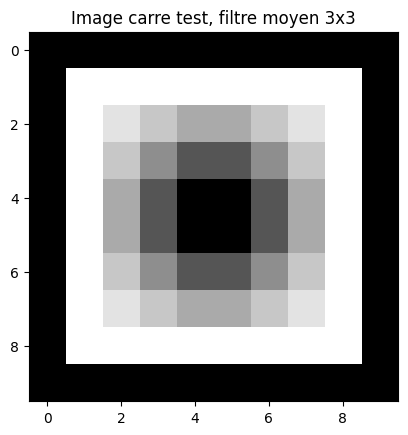

In [39]:
# Creer une image d'un carre noir sur fond blanc
square = np.ones((10, 10)) * 255
square[3:7, 3:7] = 0

# Afficher
print(square)
show_image(square, title='Image carre test')

# Test 1
mean_square = mean_filter_2D(square, 1)
print(mean_square)
show_image(mean_square, title='Image carre test, filtre moyen 3x3')

* Faites de même avec l'image papillon.bmp, avec des filtres 3x3 et 11x11.

* Que pensez-vous du résultat pour $m=5$ ?

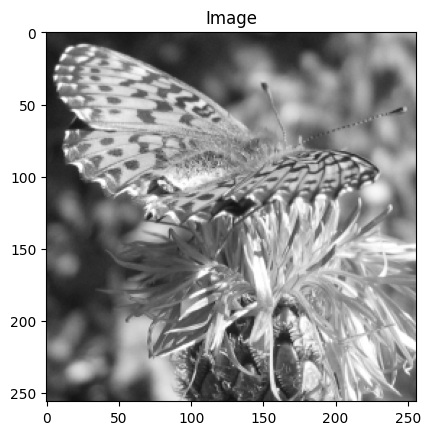

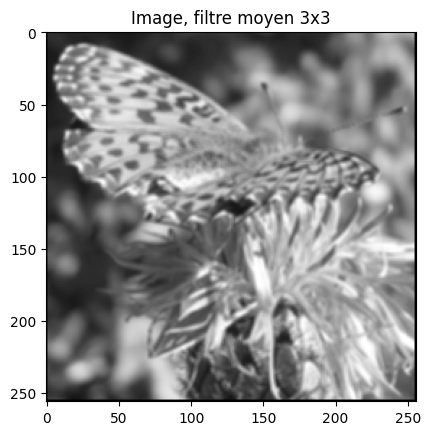

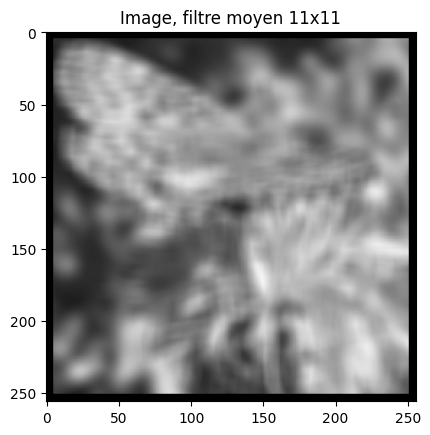

In [40]:
# Charger l'image
test_img = load_and_show_image('./papillon.bmp', title='Image')

# Test 2
# A COMPLETER
mean_test_img = mean_filter_2D(test_img, 1)
show_image(mean_test_img, title='Image, filtre moyen 3x3')

# Test 3
# A COMPLETER
mean_test_img = mean_filter_2D(test_img, 5)
show_image(mean_test_img, title='Image, filtre moyen 11x11')


# Exercice 8
## Moyenne pondérée 2D

On étend en 2D la moyenne pondérée définie dans l'exercice 3.

* Etant donné une matrice $W$ de taille $(2m+1)^2$ qu'on suppose normalisée, et une image $im$ contenant un signal, comment calculer la moyenne pondérée par les poids $W$ ?

_**Indications** : l'opérateur numpy $*$ réalise le produit terme à terme de deux tableaux, et la fonction $np.sum$ renvoie la somme des éléments d'un tableau._

* Modifiez la fonction dans la cellule ci-dessous pour qu'elle réalise l'opération de moyenne pondérée par les poids $W$ sur les éléments de l'image $im$ et renvoie le résultat.

In [41]:
# Ecrire une fonction qui applique un filtre en 2D a une image
def apply_filter_2D(im, W):
    fil_img = np.empty(im.shape)
    m = int((W.shape[0] - 1) / 2)
    # Que se passe-t-il si le filtre a une taille paire ?
    # Quels autres checks faudrait il mettre en place?

    # Calculer l'image filtree
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            ok, win = check_and_get_window_2D(im,i,j,m)
            if ok:
                mean_val = np.sum(win*W) / len(W)
            else:
                mean_val = 0
            fil_img[i, j] = mean_val
    return fil_img

* Testez avec les poids $W = (1/9)*np.ones(3,3)$, vous devez retrouver le même résultat qu'à l'exercice précédent.

W=
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
square=
[[255. 255. 255. 255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255.   0.   0.   0.   0. 255. 255. 255.]
 [255. 255. 255.   0.   0.   0.   0. 255. 255. 255.]
 [255. 255. 255.   0.   0.   0.   0. 255. 255. 255.]
 [255. 255. 255.   0.   0.   0.   0. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255.]
 [255. 255. 255. 255. 255. 255. 255. 255. 255. 255.]]
mean_square=
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         85.         85.         85.         85.         85.
  85.         85.         85.          0.        ]
 [ 0.         85.         75.55555556 66.11111111 56.66666667 56.66666667
  66.11111111 75.55555556 85

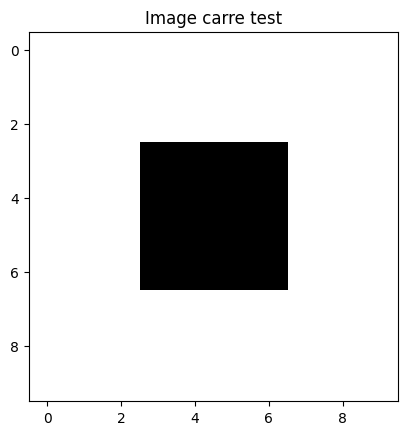

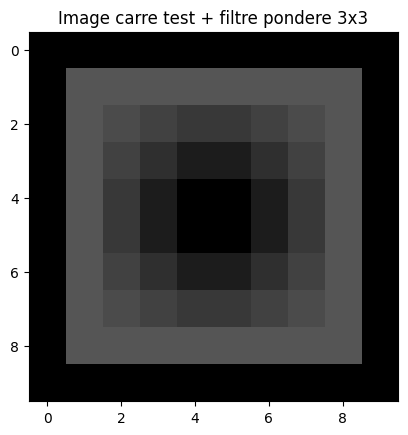

In [42]:
# Creer un filtre moyen 3x3 (m=1)
W = np.ones((3, 3)) / 9
print(f'W=\n{W}')

# Test 1: carre noir sur fond blanc
square = np.ones((10, 10)) * 255
square[3:7, 3:7] = 0
print(f'square=\n{square}')
show_image(square, title='Image carre test')
#
# A COMPLETER
mean_square = apply_filter_2D(square,W)
print(f'mean_square=\n{mean_square}')
show_image(mean_square, title='Image carre test + filtre pondere 3x3')

* Faites de même avec l'image papillon.bmp.

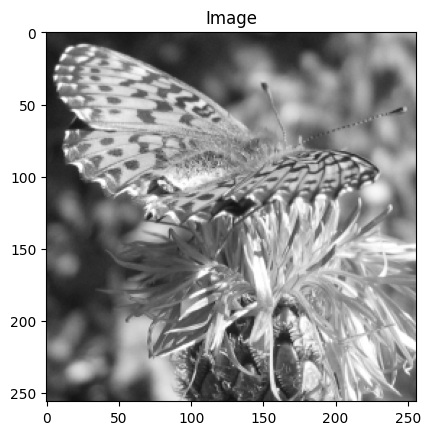

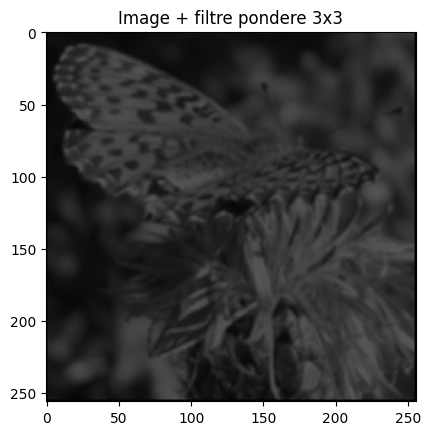

In [43]:
# Test 2
test_img = load_and_show_image('./papillon.bmp', title='Image')
# A COMPLETER
mean_test_img = apply_filter_2D(test_img,W)
show_image(mean_test_img, title='Image + filtre pondere 3x3')

# Exercice 9
## Filtre gaussien

On peut étendre à deux dimensions la fonction gaussienne vue auparavant :
$f_{2D}(x,y) = e^{-\frac{x^2+y^2}{2\sigma^2}}$. Elle possède les mêmes bonnes propriétés pour obtenir des poids : valeur plus importante sur l'élément central de la fenêtre et décroissance régulière; de plus elle ne possède pas de direction privilégiée.

Par ailleurs, on peut observer que $f_{2D}(x,y) = e^{-\frac{x^2}{2\sigma^2}}e^{-\frac{y^2}{2\sigma^2}} = f(x)f(y)$, ce qui implique qu'on peut construire le filtre gaussien $G2D$ correspondant à $f_{2D}$ à partir du filtre gaussien 1D $G$ construit plus haut :
$\tt \forall (i,j), G2D(i,j) = G(i)*G(j)$

* Modifiez la cellule ci-dessous pour qu'elle renvoie le tableau $G2D$ décrit ci-dessus. Il y a (au moins) deux façons de faire : soit en réutilisant les termes du filtre 1D, soit en repartant du calcul de $L$ puis en échantillonnant la fonction $f_{2D}$.

* Pour $\sigma=0.5$ et $\epsilon=0.001$ e tableau doit contenir les valeurs suivantes :

|           |           |           |
|-----------|-----------|-----------|
| 0.0113437 | 0.0838195 | 0.0113437 |
| 0.0838195 | 0.619347  | 0.0838195 |
| 0.0113437 | 0.0838195 | 0.0113437 |


* Remarquez qu'on a bien $\sum_{i, j} \texttt{G2D}_{ij} = 1$.

In [51]:
import numpy as np
import math


# Fonction gaussienne 2D
def f_2D(x, y, sig):
    return f(x, sig) * f(y, sig)

# Fonction qui calcule un filtre gaussien en 2D
def get_gauss_filter_2D(sigma, epsilon):
    # Trouver le plus grand entier L tel que f(L) > epsilon
    L = int(sigma * math.sqrt(-math.log(epsilon)))

    # Calculer les poids
    w = np.empty((2 * L + 1, 2 * L + 1))
    for i in range(-L, L + 1):
        for j in range(-L, L + 1):
            w[i + L, j + L] = f_2D(i, j, sigma)

    # Normaliser les poids pour obtenir le filtre
    w_sum = np.sum(w)
    fil = w / w_sum
    return fil

# Test
G2D = get_gauss_filter_2D(sigma=0.5, epsilon=0.001)
print(f'G2D=\n{G2D}')
print(f'somme= {np.sum(G2D)}')


G2D=
[[0.01134374 0.08381951 0.01134374]
 [0.08381951 0.61934703 0.08381951]
 [0.01134374 0.08381951 0.01134374]]
somme= 1.0


* Vous pouvez maintenant utiliser la fonction de l'exercice précédent pour appliquer le filtre gaussien sur l'image papillon.bmp.

* Vous pouvez faire varier $\sigma$.

* Que pensez-vous du résultat pour $\sigma = 2.5$ en comparaison avec le résultat avec un filtre moyenne de grande taille ?

* Comparer a l'image produite par un filtre moyen de grande taille (m=5) plus haut.

G2D (13, 13)=
[[8.16833870e-05 1.96930454e-04 4.04580464e-04 7.08287893e-04
  1.05664137e-03 1.34325445e-03 1.45513017e-03 1.34325445e-03
  1.05664137e-03 7.08287893e-04 4.04580464e-04 1.96930454e-04
  8.16833870e-05]
 [1.96930454e-04 4.74779573e-04 9.75402922e-04 1.70761107e-03
  2.54745637e-03 3.23845175e-03 3.50817290e-03 3.23845175e-03
  2.54745637e-03 1.70761107e-03 9.75402922e-04 4.74779573e-04
  1.96930454e-04]
 [4.04580464e-04 9.75402922e-04 2.00390016e-03 3.50817290e-03
  5.23357897e-03 6.65318283e-03 7.20730691e-03 6.65318283e-03
  5.23357897e-03 3.50817290e-03 2.00390016e-03 9.75402922e-04
  4.04580464e-04]
 [7.08287893e-04 1.70761107e-03 3.50817290e-03 6.14166182e-03
  9.16228279e-03 1.16475442e-02 1.26176340e-02 1.16475442e-02
  9.16228279e-03 6.14166182e-03 3.50817290e-03 1.70761107e-03
  7.08287893e-04]
 [1.05664137e-03 2.54745637e-03 5.23357897e-03 9.16228279e-03
  1.36685198e-02 1.73760941e-02 1.88232980e-02 1.73760941e-02
  1.36685198e-02 9.16228279e-03 5.23357897e-03

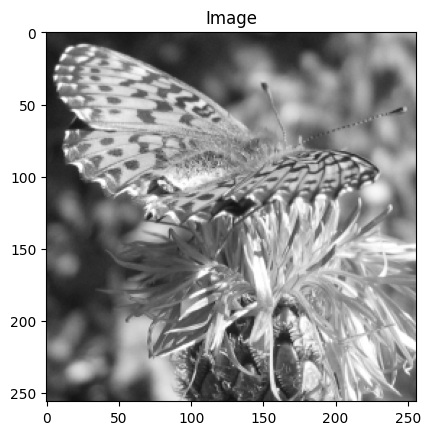

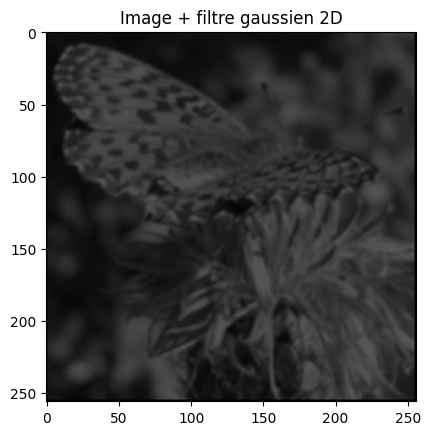

In [52]:
# Test 2
im = load_and_show_image('./papillon.bmp', title='Image')
G2D = get_gauss_filter_2D(2.5,0.001)
im2 = apply_filter_2D(im,W)

print(f'G2D {G2D.shape}=\n{G2D}')
show_image(im2, title='Image + filtre gaussien 2D')

# Exercice 10
## Lissage d'une image bruitée

On reprend l'image bruitée papillon_noise.bmp.

* Appliquez le filtre moyenne à l'image bruitée pour plusieurs tailles de fenêtres.

* Faites de même avec le filtre gaussien pour plusieurs valeurs de $\sigma$.

* Avec quel filtre obtient-on le meilleur résultat ?

Filtre gaussien, sigma= 0.5, 3 x 3
Filtre gaussien, sigma= 1, 5 x 5
Filtre gaussien, sigma= 3, 15 x 15
Filtre gaussien, sigma= 5, 27 x 27
Filtre moyen 3 x 3
Filtre moyen 5 x 5
Filtre moyen 15 x 15
Filtre moyen 27 x 27


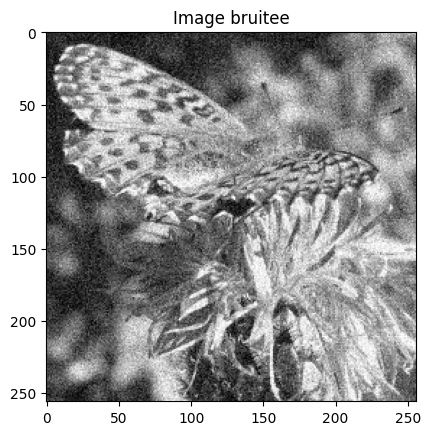

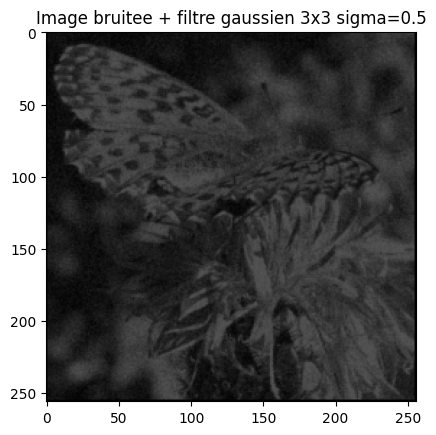

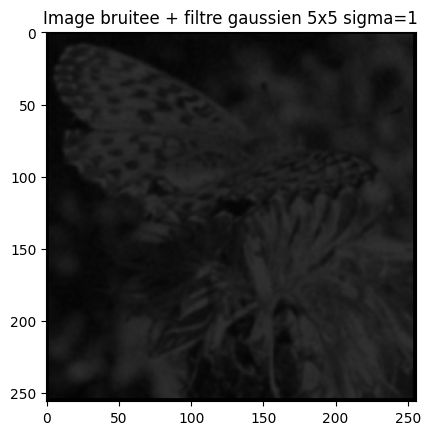

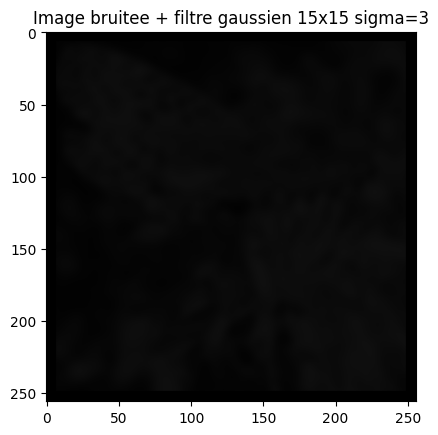

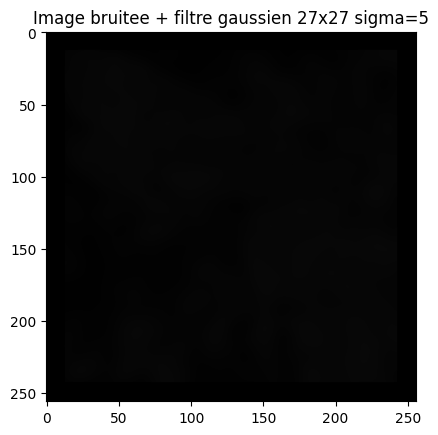

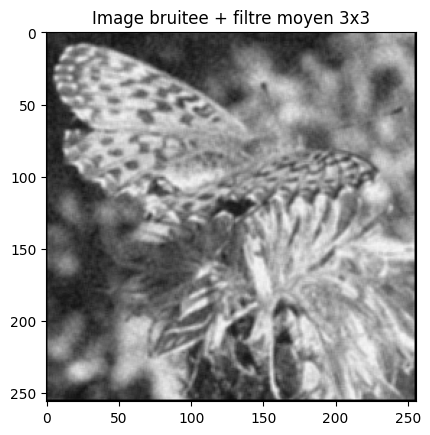

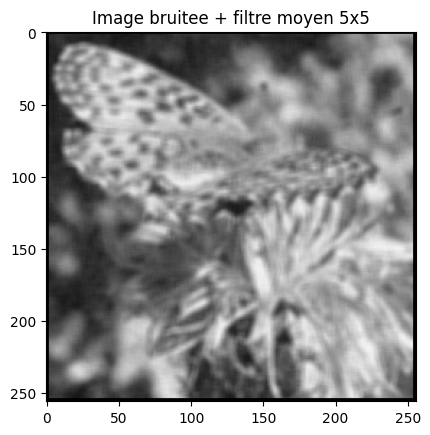

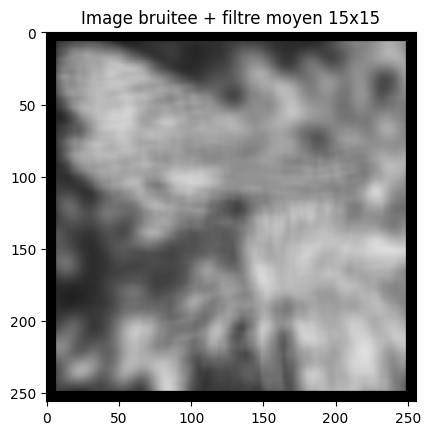

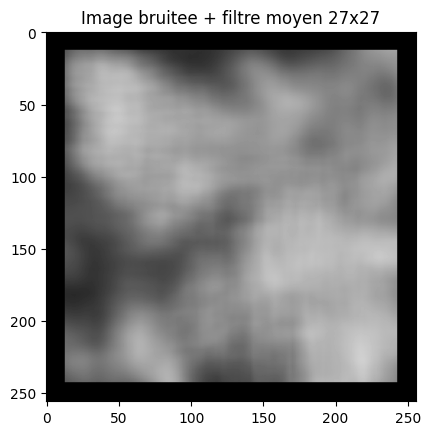

In [53]:
# Charger l'image bruitee
img = load_and_show_image('./papillon_noise.bmp', title='Image bruitee')

# Lisser avec des filtres gaussiens, avec sigma= 0.5, 1, 3, 5
gauss_sizes = []
for sigma in [0.5, 1, 3, 5]:
    # Generer le filtre gaussien
    
    gauss_fil = get_gauss_filter_2D(sigma,0.001)
    size = gauss_fil.shape[0]
    print(f'Filtre gaussien, sigma= {sigma}, {size} x {size}')

    # Garder en memoire ses dimensions
    gauss_sizes.append(size)

    # Appliquer a l'image
    gauss_img = apply_filter_2D(img, gauss_fil)
    
    # Afficher l'image
    show_image(gauss_img, title=f'Image bruitee + filtre gaussien {size}x{size} sigma={sigma}')

# Lisser avec des filtres moyens de MEME taille que les filtres gaussiens utilises plus haut
for size in gauss_sizes:
    # Generer le filtre moyen
    # A COMPLETER
    mean_fil = np.ones(size) / size
    print(f'Filtre moyen {size} x {size}')

    # Appliquer a l'image
    # A COMPLETER
    mean_img = apply_filter_2D(img,mean_fil)
    
    # Afficher l'image
    show_image(mean_img, title=f'Image bruitee + filtre moyen {size}x{size}')

# Exercice 11
## Technique du masque flou

La technique du masque flou consiste à utiliser une version floue d'une image pour augmenter la netteté et faire ressortir ses détails :

* Soit $I$ une image et $I_f$ sa version floue ; le masque est $I_m = I - I_f$, il contient les éléments ``non flous'' de l'image, donc ses détails.

* L'image traitée est obtenue en combinant l'image initiale $I$ et le masque $I_m$. Nous nous limiterons aux combinaisons de la forme $I + \alpha I_m$ pour $\alpha>0$ mais il en existe d'autres.

**REMARQUE** : A partir de maintenant nous utiliserons la fonction `signal.convolve2d()` de la librairie `scipy` pour appliquer un filtre $H$ à une image $im$.

* Dans la cellule ci-dessous complétez la fonction qui prend en entrée une image $im$ et le paramètre $\sigma$ afin qu'elle renvoie le masque obtenu par différence entre $im$ et de sa version floue obtenue par convolution avec le filtre gaussien de paramètre $\sigma$.

In [54]:
# Ecrire une fonction qui calcule le masque flou d'une image img := img - img * G2D(sigma)
def get_mask(im, sigma):
    # Calculer le filtre
    # A COMPLETER
    fil = get_gauss_filter_2D(sigma,0.001)
    print(fil.shape)

    print(im.shape)

    
    # Calculer la convolution
    # Differences avec les calculs precedents:
    # - bien plus rapide
    # - le masque est retourne afin de respecter la definition de l'operateur de convolution
    # - gestion des bords differente (on 'rajoute' des pixels nuls lorsque le masque deborde de l'image)
    # ==> Pourquoi ce retournement ? est-ce que cela change notre resultat ?
    print_timestamp('Start convolve 2D')
    gauss_im = signal.convolve2d(im, fil, mode='same')
    print_timestamp('End convolve 2D')

    # Soustraire: attention ici le masque n'est plus veritablement une image car il peut contenir
    # des valeurs negatives
    # A COMPLETER
    mask = im - gauss_im
    
    return mask

* Ecrivez une fonction qui applique le masque flou à une image.

In [57]:
import numpy as np

def apply_mask(img, mask, alpha):
    """
    img: input image
    mask: input mask
    alpha: coefficient
    returns: masked image
    """
    # Que faut-il verifier ici pour que le programme ne crashe pas?
    if img.shape != mask.shape:
        raise ValueError('Shape mismatch!')

    if True:  # Testez les deux versions en changeant ce flag à False
        # Version pythonesque: sans boucles
        new_img = (img + alpha * mask).clip(0, 255).astype(np.uint8)
    else:
        # Version 'white box' (sans doute moins performante), avec des boucles for
        new_img = np.empty(img.shape)
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                new_val = (img[i, j] + alpha * mask[i, j]).clip(0, 255).astype(np.uint8)
                new_img[i, j] = new_val

    return new_img


Vous pouvez tester cette fonction sur une image contenant deux "gros pixels" (voir cellule ci-dessous).

1. Generer l'image test
2. Calculer le masque avec $\sigma=1.5$, et l'afficher
3. Appliquer le masque avec $\alpha=1.2$, et afficher le resultat

(7, 7)
(50, 100)
[2024-02-06 21:08:04.228] Start convolve 2D
[2024-02-06 21:08:04.229] End convolve 2D


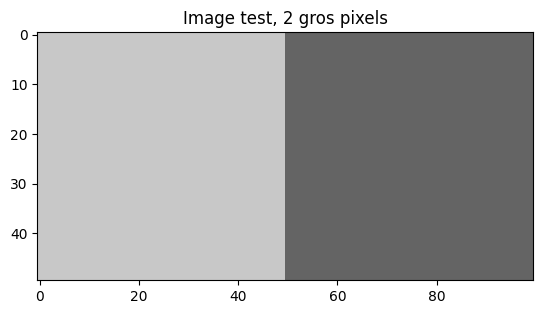

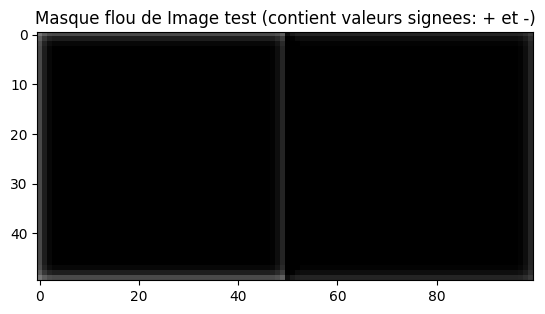

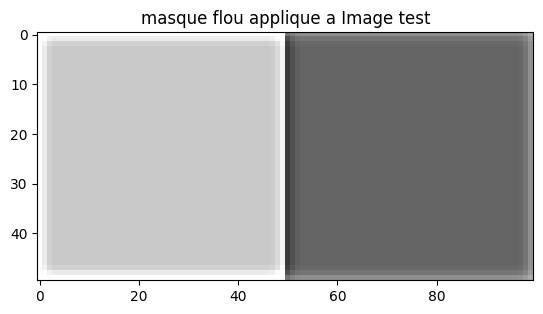

In [58]:
# Test 1
im = np.ones((50, 100)) * 200
im[:, 50:100] = 100
show_image(im, title='Image test, 2 gros pixels')

mask = get_mask(im,1.5)
show_image(mask, check_bounds=False, title='Masque flou de Image test (contient valeurs signees: + et -)')

im_masked = apply_mask(im,mask,1.2)
show_image(im_masked, title='masque flou applique a Image test')

Pour comprendre le fonctionnement du filtre, nous allons visualiser ce qui se passe sur une ligne horizontale de l'image.

Le code dans la cellule ci-dessous prend la ligne du milieu (y=50) de l'image et du masque et visualise les effets de l'opération.

* Expliquer pourquoi cet operateur augmente le contraste entre les regions sombre et claire.

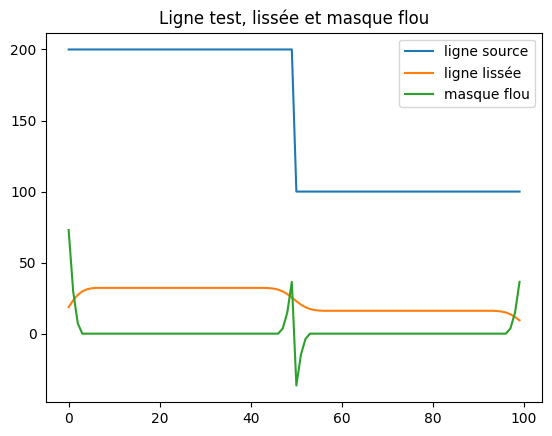

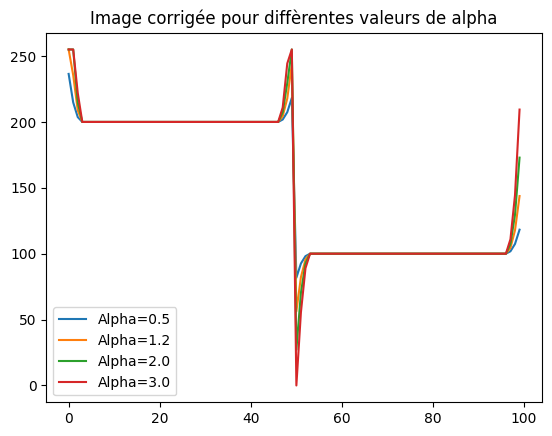

In [60]:
# Extrait la ligne du milieu de l'image avant et apres masquage
im_row = im[25, :]
mask_row = mask[25, :]

# Retrouve l'image filtree par le filtre gaussien
# A COMPLETER
gauss_row = signal.convolve2d(im_row.reshape(1, -1), G2D, mode='same').flatten()

# Afficher les 3 lignes ensemble
show_vectors(im_row, gauss_row, mask_row,
             labels=['ligne source', 'ligne lissée', 'masque flou'],
             title='Ligne test, lissée et masque flou')

# Effet du masque flou sur l'image pour diffèrentes valeurs de alpha
test_alphas = []
labels_alpha = []
for alpha in [0.5, 1.2, 2.0, 3.0]:
    im_masked_row = np.clip(im_row + alpha * mask_row, 0, 255)
    test_alphas.append(im_masked_row)
    labels_alpha.append(f'Alpha={alpha}')

show_vectors(*test_alphas, labels=labels_alpha, title='Image corrigée pour diffèrentes valeurs de alpha')

* Testez avec l'image sweets.bmp pour différentes valeurs de $\alpha$ : 1, 5, 10.

(7, 7)
(600, 600)
[2024-02-06 21:12:47.814] Start convolve 2D
[2024-02-06 21:12:47.904] End convolve 2D


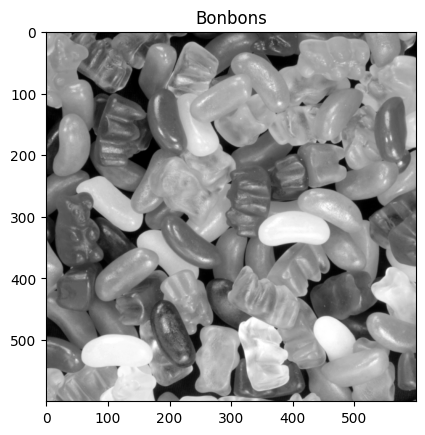

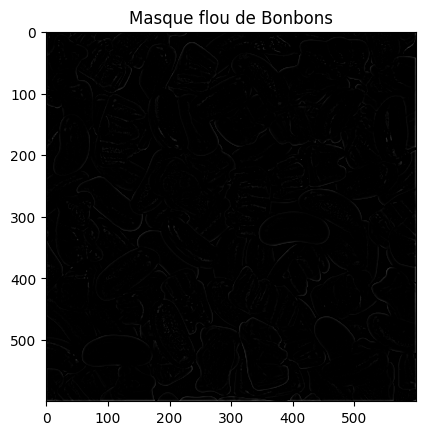

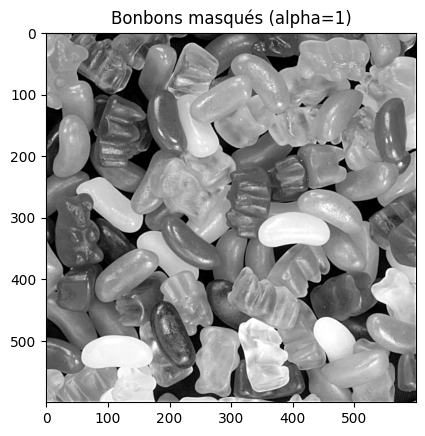

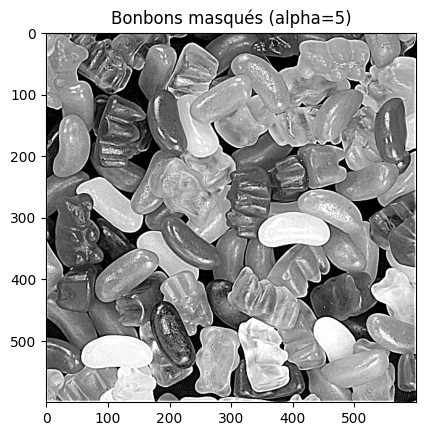

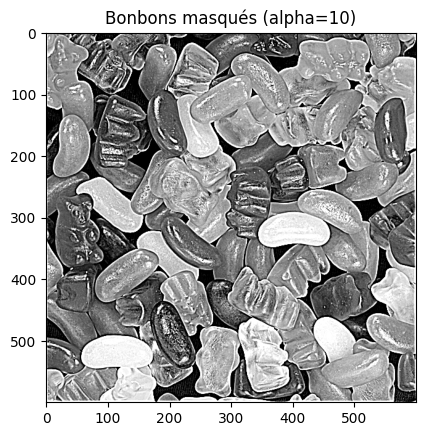

In [61]:
# Test 2
test_img = load_and_show_image('./sweets.bmp', title='Bonbons')

# A COMPLETER
mask = get_mask(test_img, sigma=1.5)

show_image(mask, check_bounds=False, title='Masque flou de Bonbons')

for alpha in [1, 5, 10]:
    # A COMPLETER
    test_img_masked = apply_mask(test_img, mask, alpha)
    show_image(test_img_masked, title=f'Bonbons masqués (alpha={alpha})')
